In [ ]:
import tensorflow as tf

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving lowBirthWeight_609be41e05f61.xlsx to lowBirthWeight_609be41e05f61 (1).xlsx


In [ ]:
import io
df = pd.read_excel(io.BytesIO(uploaded['lowBirthWeight_609be41e05f61.xlsx']))

In [ ]:
df.head()

,CLASS,ID,AGE,LWT,RACE,SMOKE,PTL,HT,UI,birthWeight
0,1,37323,28,113,1,1,1,0,1,709
1,1,16093,29,130,0,0,0,0,1,1021
2,1,48274,34,187,1,1,0,1,0,1135
3,1,83719,25,105,1,0,1,1,0,1330
4,1,24997,25,85,1,0,0,0,1,1474


In [ ]:
df.describe()

,CLASS,ID,AGE,LWT,RACE,SMOKE,PTL,HT,UI,birthWeight
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,0.312169,52094.349206,23.238095,129.846561,0.486772,0.391534,0.169312,0.079365,0.153439,2944.656085
std,0.464609,25180.168782,5.298678,29.445997,0.501153,0.489390,0.376024,0.271026,0.361368,729.022417
min,0.000000,10625.000000,14.000000,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,709.000000
25%,0.000000,31009.000000,19.000000,110.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2414.000000
50%,0.000000,53930.000000,23.000000,122.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2977.000000
75%,1.000000,73228.000000,26.000000,141.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3475.000000
max,1.000000,99435.000000,45.000000,250.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4990.000000


In [ ]:
df.nunique()

CLASS            2
ID             189
AGE             24
LWT             73
RACE             2
SMOKE            2
PTL              2
HT               2
UI               2
birthWeight    133
dtype: int64

In [ ]:
df1 = df.drop(['ID'], axis=1)

In [ ]:
df1.columns

Index(['CLASS', 'AGE', 'LWT', 'RACE', 'SMOKE', 'PTL', 'HT', 'UI',
       'birthWeight'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

In [ ]:
df2  = pd.DataFrame(min_max_scaler.fit_transform(df1))
df2.columns = df1.columns

In [ ]:
df2.head()

,CLASS,AGE,LWT,RACE,SMOKE,PTL,HT,UI,birthWeight
0,1.0,0.451613,0.194118,1.0,1.0,1.0,0.0,1.0,0.000000
1,1.0,0.483871,0.294118,0.0,0.0,0.0,0.0,1.0,0.072880
2,1.0,0.645161,0.629412,1.0,1.0,0.0,1.0,0.0,0.099509
3,1.0,0.354839,0.147059,1.0,0.0,1.0,1.0,0.0,0.145060
4,1.0,0.354839,0.029412,1.0,0.0,0.0,0.0,1.0,0.178697


In [ ]:
import numpy as np
X = np.asarray(df2[['AGE','LWT','RACE','SMOKE','PTL','HT','UI','birthWeight']])
X[0:5]

array([[0.4516129 , 0.19411765, 1.        , 1.        , 1.        ,
        0.        , 1.        , 0.        ],
       [0.48387097, 0.29411765, 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.07288017],
       [0.64516129, 0.62941176, 1.        , 1.        , 0.        ,
        1.        , 0.        , 0.09950946],
       [0.35483871, 0.14705882, 1.        , 0.        , 1.        ,
        1.        , 0.        , 0.14505957],
       [0.35483871, 0.02941176, 1.        , 0.        , 0.        ,
        0.        , 1.        , 0.17869657]])

In [ ]:
y = np.asarray(df2[['CLASS']])
y[0:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [ ]:
X.shape

(189, 8)

In [ ]:
y.shape

(189, 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
def design_model(features):
  model = Sequential()
  input = InputLayer(input_shape=(features.shape[1],))
  model.add(input)
  model.add(Dense(1, activation = 'sigmoid'))
  opt = Adam(learning_rate=0.01)
  model.compile(loss='BinaryCrossentropy',optimizer = opt,metrics=['accuracy'])
  return model

In [ ]:
model = design_model(X_train)

In [ ]:
history = model.fit(X_train,y_train,epochs=50,batch_size=25)

Epoch 1/50
7/7 [==============================] - 0s 2ms/step - loss: 0.7681 - accuracy: 0.4631
Epoch 2/50
7/7 [==============================] - 0s 2ms/step - loss: 0.7311 - accuracy: 0.4715
Epoch 3/50
7/7 [==============================] - 0s 1ms/step - loss: 0.6952 - accuracy: 0.4897
Epoch 4/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6847 - accuracy: 0.5065
Epoch 5/50
7/7 [==============================] - 0s 1ms/step - loss: 0.6249 - accuracy: 0.6323
Epoch 6/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6340 - accuracy: 0.6509
Epoch 7/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6181 - accuracy: 0.6762
Epoch 8/50
7/7 [==============================] - 0s 2ms/step - loss: 0.5805 - accuracy: 0.7272
Epoch 9/50
7/7 [==============================] - 0s 2ms/step - loss: 0.5884 - accuracy: 0.7425
Epoch 10/50
7/7 [==============================] - 0s 1ms/step - loss: 0.5698 - accuracy: 0.7486
Epoch 11/50
7/7 [======================

In [ ]:
X_before = np.asarray(df1[['AGE','LWT','RACE','SMOKE','PTL','HT','UI','birthWeight']])
y_before = np.asarray(df2[['CLASS']])
X_trainbf, X_testbf, y_trainbf, y_testbf = train_test_split(X_before,y_before, test_size=0.2, random_state = 1)

In [ ]:
X_train_scaled_bf = pd.DataFrame(min_max_scaler.fit_transform(X_trainbf))
X_test_scaled_bf = pd.DataFrame(min_max_scaler.fit_transform(X_testbf))
y_train_scaled_bf = pd.DataFrame(min_max_scaler.fit_transform(y_trainbf))
y_test_scaled_bf = pd.DataFrame(min_max_scaler.fit_transform(y_testbf))

In [ ]:
history2 = model.fit(X_train_scaled_bf,y_train_scaled_bf,epochs=50,batch_size=25)

Epoch 1/50
7/7 [==============================] - 0s 2ms/step - loss: 0.4762 - accuracy: 0.7550
Epoch 2/50
7/7 [==============================] - 0s 2ms/step - loss: 0.4753 - accuracy: 0.7616
Epoch 3/50
7/7 [==============================] - 0s 2ms/step - loss: 0.4732 - accuracy: 0.7550
Epoch 4/50
7/7 [==============================] - 0s 2ms/step - loss: 0.4715 - accuracy: 0.7616
Epoch 5/50
7/7 [==============================] - 0s 2ms/step - loss: 0.4706 - accuracy: 0.7616
Epoch 6/50
7/7 [==============================] - 0s 2ms/step - loss: 0.4688 - accuracy: 0.7682
Epoch 7/50
7/7 [==============================] - 0s 2ms/step - loss: 0.4673 - accuracy: 0.7682
Epoch 8/50
7/7 [==============================] - 0s 2ms/step - loss: 0.4663 - accuracy: 0.7682
Epoch 9/50
7/7 [==============================] - 0s 2ms/step - loss: 0.4654 - accuracy: 0.7682
Epoch 10/50
7/7 [==============================] - 0s 2ms/step - loss: 0.4640 - accuracy: 0.7616
Epoch 11/50
7/7 [======================

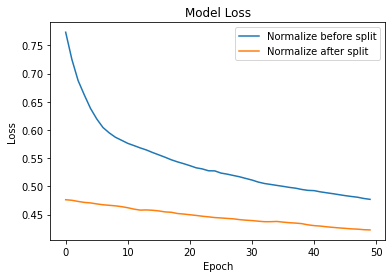

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label ='Normalize before split' )
plt.plot(history2.history['loss'], label = 'Normalize after split')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

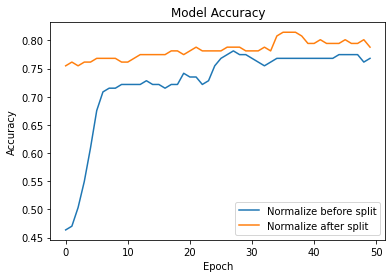

In [ ]:
plt.plot(history.history['accuracy'], label = 'Normalize before split')
plt.plot(history2.history['accuracy'], label = 'Normalize after split')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

จะเห็นได้ว่า ประสิทธิภาพของโมเดลเมื่อ min-max scaling หลังจาก split data มี accuracy ที่ดีกว่า และ loss ที่น้อยกว่าอย่างชัดเจน โดยมี accuracy สูงถึง 0.78 ใน epoch แรก ซี่งการ train model โดยที่ scale data ก่อนจะทำให้ได้ accuracy ใน epoch แรกเพียง 0.46 เท่านั้น คาดว่าสาเหตุที่เกิดเหตุการณ์นี้ขึ้น เป็นเพราะว่า การทำ scaling ก่อน split dataset นั้นทำให้เกิดการรั่วไหลของข้อมูลระหว่างชุด จึงทำให้มีประสิทธิภาพของ model ที่ไม่ดีนัก